# import library and set data directory

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from pathlib import Path

dreamt_info_dir = "/media/nvme1/sleep/DREAMT_Version2/participant_info.csv"

# requires hard drive
shhs_info_dir = (
    "/media/nvme1/sleep/shhs/shhs/datasets/shhs-harmonized-dataset-0.21.0.csv"
)
mesa_info_dir = (
    "/media/nvme1/sleep/mesa/mesa/datasets/mesa-sleep-harmonized-dataset-0.7.0.csv"
)

In [12]:
mesa_df = pd.read_csv(mesa_info_dir)
mesa_df

,mesaid,examnumber,nsrr_age,nsrr_bmi,nsrr_age_gt89,nsrr_sex,nsrr_race,nsrr_current_smoker,nsrr_ever_smoker,nsrr_ahi_hp3u,...,nsrr_ttlmefsp_f1,nsrr_ttllatsp_f1,nsrr_ttlprdsp_s1sr,nsrr_ttldursp_s1sr,nsrr_waso_f1,nsrr_pctdursp_s1,nsrr_pctdursp_s2,nsrr_pctdursp_s3,nsrr_pctdursp_sr,nsrr_tib_f1
0,1,5,70.0,22.01,no,female,white,no,yes,18.14,...,62.66,26.0,124.0,67.0,205.5,19.70,66.2,2.77,11.4,575.0
1,2,5,83.0,21.90,no,female,white,not reported,no,8.34,...,86.37,NaN,67.0,54.0,59.0,6.55,48.4,20.90,24.2,433.0
2,6,5,57.0,56.01,no,female,hispanic,no,yes,62.51,...,72.03,NaN,78.0,21.0,139.0,19.70,53.1,10.50,16.6,497.0
3,10,5,57.0,19.84,no,male,white,not reported,no,40.91,...,55.28,NaN,0.0,0.0,89.0,9.13,57.5,33.30,0.0,199.0
4,12,5,80.0,27.77,no,male,white,not reported,no,27.47,...,47.81,12.0,416.0,138.0,298.0,15.60,69.0,2.94,12.5,583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,6804,5,77.0,24.32,no,female,black or african american,not reported,no,34.02,...,92.10,14.0,84.0,78.0,41.5,18.40,60.9,1.47,19.2,533.0
2233,6807,5,60.0,28.32,no,male,hispanic,no,yes,48.24,...,79.28,NaN,192.0,148.0,103.5,22.40,60.6,4.27,12.8,502.0
2234,6810,5,77.0,30.47,no,male,hispanic,no,yes,25.84,...,67.53,NaN,79.0,51.0,163.0,21.70,57.6,0.00,20.7,502.0
2235,6811,5,79.0,27.73,no,male,hispanic,no,yes,34.24,...,69.57,NaN,152.0,130.0,161.0,50.90,33.7,0.82,14.6,529.0


In [13]:
shhs_df = pd.read_csv(shhs_info_dir, low_memory=False)
shhs_df.head()

,nsrrid,visitnumber,nsrr_age,nsrr_age_gt89,nsrr_sex,nsrr_race,nsrr_ethnicity,nsrr_bmi,nsrr_bp_systolic,nsrr_bp_diastolic,...,nsrr_ttleffsp_f1,nsrr_ttllatsp_f1,nsrr_ttlprdsp_s1sr,nsrr_ttldursp_s1sr,nsrr_ttldurws_f1,nsrr_pctdursp_s1,nsrr_pctdursp_s2,nsrr_pctdursp_s3,nsrr_pctdursp_sr,nsrr_ttlprdbd_f1
0,200001,1,55.0,no,male,white,not hispanic or latino,21.777553,143.0,79.0,...,85.24,0.0,114.0,96.5,65.0,6.26,60.85,19.31,13.58,440.5
1,200002,1,78.0,no,male,white,not hispanic or latino,32.950680,168.0,68.0,...,80.89,0.0,37.5,36.5,43.0,0.82,65.66,16.76,16.76,225.0
2,200003,1,77.0,no,female,white,not hispanic or latino,24.114150,127.0,68.0,...,83.08,0.0,142.0,124.0,73.0,4.88,40.31,42.82,11.99,431.5
3,200004,1,48.0,no,male,white,not hispanic or latino,20.185185,130.0,83.0,...,83.96,14.0,45.0,44.5,43.5,2.99,29.40,52.33,15.28,358.5
4,200005,1,66.0,no,female,black or african american,not hispanic or latino,23.309053,145.0,78.0,...,77.57,6.5,126.5,101.5,100.5,5.68,68.65,13.38,12.30,477.0


In [14]:
dreamt_df = pd.read_csv(dreamt_info_dir, low_memory=False)
dreamt_df

,SID,AGE,GENDER,BMI,OAHI,AHI,Mean_SaO2,Arousal Index,MEDICAL_HISTORY
0,S002,65.90,M,27.0,19,19,91%,98,"Asthma, Body Pain, GERD, Hypertension, Sleep A..."
1,S003,29.38,F,51.0,34,37,95%,28,NaN
2,S004,55.66,F,41.0,63,99,89%,109,"Arrhythmia, Body Pain, Depression, Dyspnea, GERD"
3,S005,49.12,F,43.0,19,20,95%,28,"Asthma, Body Pain, Depression, Diabetes, Dyspn..."
4,S006,36.91,F,22.0,4,5,97%,34,"Depression, Sleep Apnea"
...,...,...,...,...,...,...,...,...,...
95,S099,59.92,M,26.0,31,31,94%,68,"Body Pain, CAD, GERD, Sleep Apnea"
96,S100,59.89,F,28.0,25,25,95%,20,"Body Pain, GERD"
97,S101,38.02,F,39.0,1,2,99%,20,"Diabetes, Hypertension"
98,S102,57.44,M,26.0,18,24,95%,43,"Asthma, Depression, GERD, Migraine, Sleep Apnea"


# SHHS dataset analysis

In [15]:
shhs_ecg_folder = Path("/mnt/nvme2/SHHS_MESA_IBI/")
shhs_ecg_files = os.listdir(shhs_ecg_folder)

# Extract subject IDs and visit numbers from filenames with "shhs1-" or "shhs2-" prefix
shhs_pids_visits = []
for f in shhs_ecg_files:
    if f.startswith("shhs1-"):
        pid = int(f.split("-")[1].split(".")[0])
        visit = 1
        shhs_pids_visits.append((pid, visit))
    elif f.startswith("shhs2-"):
        pid = int(f.split("-")[1].split(".")[0])
        visit = 2
        shhs_pids_visits.append((pid, visit))
    # Ignore files without "shhs1-" or "shhs2-" prefix

# Split subject IDs and visit numbers into separate lists
shhs_pids = [pid for pid, visit in shhs_pids_visits]
shhs_visits = [visit for pid, visit in shhs_pids_visits]

# Load SHHS DataFrame (Assuming it's already loaded in `shhs_df`)
# Filter the SHHS DataFrame for both visits 1 and 2
shhs_ahi_df = shhs_df.loc[
    (shhs_df["nsrrid"].isin(shhs_pids)) & (shhs_df["visitnumber"].isin(shhs_visits)),
    ["nsrrid", "visitnumber", "nsrr_ahi_hp3r_aasm15"],
]

# Now, for each file, get the corresponding AHI value based on subject ID and visit number
ahi_values = []
for pid, visit in shhs_pids_visits:
    # Filter the dataframe for the current subject and visit
    ahi_value = shhs_ahi_df.loc[
        (shhs_ahi_df["nsrrid"] == pid) & (shhs_ahi_df["visitnumber"] == visit),
        "nsrr_ahi_hp3r_aasm15",
    ]

    if not ahi_value.empty:
        ahi_values.append(ahi_value.values[0])  # Append the AHI value to the list
    else:
        ahi_values.append(None)  # Handle cases where AHI is not available

# Convert AHI values to numpy array
ahi_array = np.array(ahi_values)

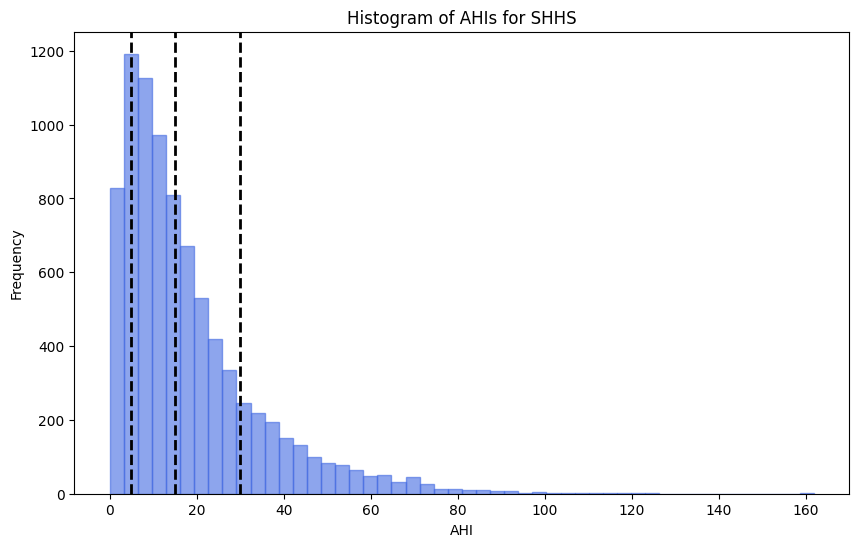

Number of values in the range 0~5: 1467 -> 17.395944503735326%
Number of values in the range 6~15: 2829 -> 33.54678050515831%
Number of values in the range 16~30: 2062 -> 24.451559350171944%
Number of values above 30: 1477 -> 17.51452626586031%


In [16]:
data = ahi_array
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, color="royalblue", alpha=0.6, edgecolor="royalblue")

# Adding vertical dashed lines at 5, 15, and 30
for x in [5, 15, 30]:
    plt.axvline(x=x, color="black", linestyle="--", linewidth=2)

# Adding labels and title
plt.xlabel("AHI")
plt.ylabel("Frequency")
plt.title("Histogram of AHIs for SHHS")
plt.show()

# Counting the number of values in the specified ranges
range_0_5 = np.sum((data >= 0) & (data <= 5))
range_6_15 = np.sum((data >= 6) & (data <= 15))
range_16_30 = np.sum((data >= 16) & (data <= 30))
range_above_30 = np.sum(data > 30)

# Displaying the counts
print(
    f"Number of values in the range 0~5: {range_0_5} -> {range_0_5/(ahi_array.shape[0])*100}%"
)
print(
    f"Number of values in the range 6~15: {range_6_15} -> {range_6_15/(ahi_array.shape[0])*100}%"
)
print(
    f"Number of values in the range 16~30: {range_16_30} -> {range_16_30/(ahi_array.shape[0])*100}%"
)
print(
    f"Number of values above 30: {range_above_30} -> {range_above_30/(ahi_array.shape[0])*100}%"
)

In [19]:
def get_files_by_apnea_category(
    ahi_df,
    category,
    idname="nsrrid",
    visitname="visitnumber",
    ahi_colname="nsrr_ahi_hp3r_aasm15",
    filename_format="shhs{visit_number}-{nsrrid}.npz",
):
    """
    Filters the subjects by apnea severity category and returns the list of formatted filenames.

    Args:
    - ahi_df: DataFrame containing apnea severity, visit number, and subject IDs.
    - category: String indicating the category of apnea severity ('normal', 'mild', 'moderate', 'severe').
    - idname: The column name in ahi_df that contains subject IDs.
    - visitname: The column name in ahi_df that contains visit numbers.
    - ahi_colname: The column name in ahi_df that contains AHI values.
    - filename_format: String format for filenames, where {nsrrid} and {visit_number} will be replaced by the subject ID and visit number.

    Returns:
    - List of filenames matching the selected category.
    """
    # Define AHI thresholds for different categories
    severity_thresholds = {
        "normal": (0, 5),
        "mild": (5, 15),
        "moderate": (15, 30),
        "severe": (30, float("inf")),
    }

    # Get the range for the chosen category
    if category not in severity_thresholds:
        raise ValueError(
            f"Invalid category: {category}. Choose from: {list(severity_thresholds.keys())}"
        )

    lower_bound, upper_bound = severity_thresholds[category]

    # Filter the DataFrame based on the apnea severity category
    selected_rows = ahi_df.loc[
        (ahi_df[ahi_colname] >= lower_bound) & (ahi_df[ahi_colname] < upper_bound),
        [idname, visitname],
    ]

    # Generate filenames using the provided format
    filenames = [
        filename_format.format(nsrrid=row[idname], visit_number=row[visitname])
        for _, row in selected_rows.iterrows()
    ]

    return filenames

In [20]:
shhs_normal_files = get_files_by_apnea_category(
    shhs_ahi_df, 
    "normal", 
    ahi_colname = "nsrr_ahi_hp3r_aasm15", 
    filename_format="shhs{visit_number}-{nsrrid}.npz"
)
shhs_mild_files = get_files_by_apnea_category(
    shhs_ahi_df,
    "mild",
    ahi_colname="nsrr_ahi_hp3r_aasm15",
    filename_format="shhs{visit_number}-{nsrrid}.npz",
)
shhs_moderate_files = get_files_by_apnea_category(
    shhs_ahi_df,
    "moderate",
    ahi_colname="nsrr_ahi_hp3r_aasm15",
    filename_format="shhs{visit_number}-{nsrrid}.npz",
)
shhs_severe_files = get_files_by_apnea_category(
    shhs_ahi_df,
    "severe",
    ahi_colname="nsrr_ahi_hp3r_aasm15",
    filename_format="shhs{visit_number}-{nsrrid}.npz",
)

In [22]:
def count_sleep_stages(file_list, load_data_func):
    """
    Count sleep stages (W: 0, N: 1, R: 2) for the list of given files.

    Args:
    - file_list: List of filenames to process.
    - load_data_func: A function to load sleep stage data from each file.

    Returns:
    - Dictionary with counts of sleep stages W, N, and R.
    """
    # Initialize the count for sleep stages W (0), N (1), and R (2)
    sleep_stage_counts = {"W": 0, "N": 0, "R": 0}

    excluded_files = 0
    # Loop through the list of files and count sleep stages
    for file in file_list:
        try:
            # Load the sleep stages from the file (using a user-provided loading function)
            sleep_stages = load_data_func(file)
        except Exception as e:
            excluded_files += 1

        # Count occurrences of sleep stages W, N, R (0, 1, 2)
        sleep_stage_counts["W"] += sleep_stages.count(0)
        sleep_stage_counts["N"] += sleep_stages.count(1) + sleep_stages.count(2) + sleep_stages.count(3) 
        sleep_stage_counts["R"] += sleep_stages.count(4)
    
    print("There are {} files that could not be processed.".format(excluded_files))

    return sleep_stage_counts

# 2. Define a function to load the sleep stages from each file.
# For demonstration purposes, this function will be a placeholder.
def load_sleep_data(file):
    data = np.load(file)
    stages = data["stages"]
    stages = stages[:: int(data["fs"] * 30)]
    return list(stages)


# 3. Count sleep stages from the list of normal files.
normal_stage_counts = count_sleep_stages(
    [shhs_ecg_folder / f for f in shhs_normal_files], load_sleep_data
)

# 4. Display the percentage of each sleep stage.
total_normal = sum(normal_stage_counts.values())
normal_percentages = {stage: count / total_normal * 100 for stage, count in normal_stage_counts.items()}
normal_percentages

There are 1 files that could not be processed.


{'W': 30.063332229131053, 'N': 55.4674164263496, 'R': 14.469251344519346}

In [24]:
mild_stage_counts = count_sleep_stages(
    [shhs_ecg_folder / f for f in shhs_mild_files], load_sleep_data
)

total_mild = sum(mild_stage_counts.values())
mild_percentages = {
    stage: count / total_mild * 100 for stage, count in mild_stage_counts.items()
}
mild_percentages

There are 3 files that could not be processed.


{'W': 31.0066720968219, 'N': 54.77329587594767, 'R': 14.220032027230431}

In [25]:
moderate_stage_counts = count_sleep_stages(
    [shhs_ecg_folder / f for f in shhs_moderate_files], load_sleep_data
)

total_moderate = sum(moderate_stage_counts.values())
moderate_percentages = {
    stage: count / total_moderate * 100 for stage, count in moderate_stage_counts.items()
}
moderate_percentages

There are 2 files that could not be processed.


{'W': 32.74104539520542, 'N': 53.810097348781795, 'R': 13.448857256012792}

In [26]:
severe_stage_counts = count_sleep_stages(
    [shhs_ecg_folder / f for f in shhs_severe_files], load_sleep_data
)

total_severe = sum(severe_stage_counts.values())
severe_percentages = {
    stage: count / total_severe * 100
    for stage, count in severe_stage_counts.items()
}
severe_percentages

There are 0 files that could not be processed.


{'W': 35.066816482132495, 'N': 53.483869791329354, 'R': 11.44931372653815}

# MESA dataset analysis

In [27]:
mesa_ecg_folder = Path("/mnt/nvme2/MESA_ECG/")
mesa_ecg_files = os.listdir(mesa_ecg_folder)
mesa_pids = [int(f.split(".")[0]) for f in mesa_ecg_files]
mesa_ahi_df = mesa_df.loc[
    (mesa_df["mesaid"].isin(mesa_pids)),
    ["mesaid", "nsrr_ahi_hp3u"],
]
mesa_ahi_array = mesa_ahi_df["nsrr_ahi_hp3u"].to_numpy()

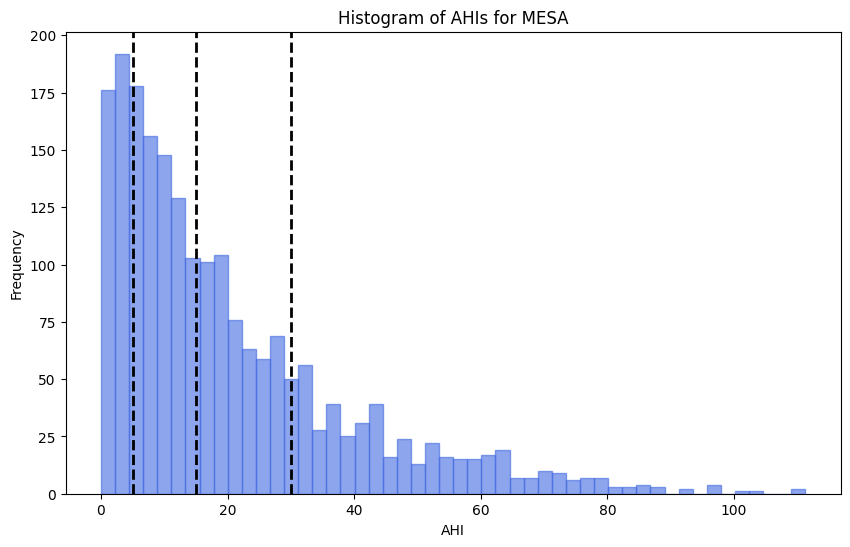

Number of values in the range 0~5: 415 -> 20.194647201946474%
Number of values in the range 6~15: 569 -> 27.688564476885645%
Number of values in the range 16~30: 474 -> 23.065693430656932%
Number of values above 30: 478 -> 23.26034063260341%


In [28]:
data = mesa_ahi_array
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, color="royalblue", alpha=0.6, edgecolor="royalblue")

# Adding vertical dashed lines at 5, 15, and 30
for x in [5, 15, 30]:
    plt.axvline(x=x, color="black", linestyle="--", linewidth=2)

# Adding labels and title
plt.xlabel("AHI")
plt.ylabel("Frequency")
plt.title("Histogram of AHIs for MESA")
plt.show()

# Counting the number of values in the specified ranges
range_0_5 = np.sum((data >= 0) & (data <= 5))
range_6_15 = np.sum((data >= 6) & (data <= 15))
range_16_30 = np.sum((data >= 16) & (data <= 30))
range_above_30 = np.sum(data > 30)

# Displaying the counts
print(
    f"Number of values in the range 0~5: {range_0_5} -> {range_0_5/(mesa_ahi_array.shape[0])*100}%"
)
print(
    f"Number of values in the range 6~15: {range_6_15} -> {range_6_15/(mesa_ahi_array.shape[0])*100}%"
)
print(
    f"Number of values in the range 16~30: {range_16_30} -> {range_16_30/(mesa_ahi_array.shape[0])*100}%"
)
print(
    f"Number of values above 30: {range_above_30} -> {range_above_30/(mesa_ahi_array.shape[0])*100}%"
)

In [29]:
def get_files_by_apnea_category(
    ahi_df,
    category,
    idname="nsrrid",
    ahi_colname="nsrr_ahi_hp3r_aasm15",
    filename_format="shhs1-{id}.npz",
):
    """
    Filters the subjects by apnea severity category and returns the list of formatted filenames.

    Args:
    - ahi_df: DataFrame containing apnea severity and subject IDs.
    - category: String indicating the category of apnea severity ('normal', 'mild', 'moderate', 'severe').
    - filename_format: String format for filenames, where {nsrrid} will be replaced by the subject ID.

    Returns:
    - List of filenames matching the selected category.
    """
    # Define AHI thresholds for different categories
    severity_thresholds = {
        "normal": (0, 5),
        "mild": (5, 15),
        "moderate": (15, 30),
        "severe": (30, float("inf")),
    }

    # Get the range for the chosen category
    if category not in severity_thresholds:
        raise ValueError(
            f"Invalid category: {category}. Choose from: {list(severity_thresholds.keys())}"
        )

    lower_bound, upper_bound = severity_thresholds[category]

    # Filter the IDs based on the apnea severity category
    selected_ids = ahi_df.loc[
        (ahi_df[ahi_colname] >= lower_bound) & (ahi_df[ahi_colname] < upper_bound),
        idname,
    ].tolist()

    # Generate filenames using the provided format
    filenames = [filename_format.format(id=nsrrid) for nsrrid in selected_ids]

    return filenames

In [30]:
mesa_normal_files = get_files_by_apnea_category(
    mesa_ahi_df,
    "normal",
    idname="mesaid",
    ahi_colname="nsrr_ahi_hp3u",
    filename_format="{id:04}.npz",
)
mesa_mild_files = get_files_by_apnea_category(
    mesa_ahi_df,
    "mild",
    idname="mesaid",
    ahi_colname="nsrr_ahi_hp3u",
    filename_format="{id:04}.npz",
)
mesa_moderate_files = get_files_by_apnea_category(
    mesa_ahi_df,
    "moderate",
    idname="mesaid",
    ahi_colname="nsrr_ahi_hp3u",
    filename_format="{id:04}.npz",
)
mesa_severe_files = get_files_by_apnea_category(
    mesa_ahi_df,
    "severe",
    idname="mesaid",
    ahi_colname="nsrr_ahi_hp3u",
    filename_format="{id:04}.npz",
)

In [31]:
mesa_ecg_folder / mesa_normal_files[0]

PosixPath('/mnt/nvme2/MESA_ECG/0016.npz')

In [32]:
def load_sleep_data(file):
    data = np.load(file)
    stages = data["stages"]
    stages = stages[:: int(data["fs"] * 30)]
    return list(stages)

normal_stage_counts = count_sleep_stages(
    [mesa_ecg_folder / f for f in mesa_normal_files], load_sleep_data
)

total_normal = sum(normal_stage_counts.values())
normal_percentages = {
    stage: count / total_normal * 100 for stage, count in normal_stage_counts.items()
}
normal_percentages

There are 0 files that could not be processed.


{'W': 42.03542255510249, 'N': 46.52797919308762, 'R': 11.436598251809894}

In [33]:
mild_stage_counts = count_sleep_stages(
    [mesa_ecg_folder / f for f in mesa_mild_files], load_sleep_data
)

total_mild = sum(mild_stage_counts.values())
mild_percentages = {
    stage: count / total_mild * 100 for stage, count in mild_stage_counts.items()
}
mild_percentages

There are 0 files that could not be processed.


{'W': 41.77456586909283, 'N': 47.089522379055836, 'R': 11.135911751851328}

In [34]:
moderate_stage_counts = count_sleep_stages(
    [mesa_ecg_folder / f for f in mesa_moderate_files], load_sleep_data
)

total_moderate = sum(moderate_stage_counts.values())
moderate_percentages = {
    stage: count / total_moderate * 100 for stage, count in moderate_stage_counts.items()
}
moderate_percentages

There are 0 files that could not be processed.


{'W': 43.160579417787204, 'N': 46.592821684419036, 'R': 10.246598897793763}

In [35]:
severe_stage_counts = count_sleep_stages(
    [mesa_ecg_folder / f for f in mesa_severe_files], load_sleep_data
)

total_severe = sum(severe_stage_counts.values())
severe_percentages = {
    stage: count / total_severe * 100
    for stage, count in severe_stage_counts.items()
}
severe_percentages

There are 0 files that could not be processed.


{'W': 46.593322418815056, 'N': 45.08550801822593, 'R': 8.321169562959017}

# DREAMT Analysis

In [36]:
dreamt_df

,SID,AGE,GENDER,BMI,OAHI,AHI,Mean_SaO2,Arousal Index,MEDICAL_HISTORY
0,S002,65.90,M,27.0,19,19,91%,98,"Asthma, Body Pain, GERD, Hypertension, Sleep A..."
1,S003,29.38,F,51.0,34,37,95%,28,NaN
2,S004,55.66,F,41.0,63,99,89%,109,"Arrhythmia, Body Pain, Depression, Dyspnea, GERD"
3,S005,49.12,F,43.0,19,20,95%,28,"Asthma, Body Pain, Depression, Diabetes, Dyspn..."
4,S006,36.91,F,22.0,4,5,97%,34,"Depression, Sleep Apnea"
...,...,...,...,...,...,...,...,...,...
95,S099,59.92,M,26.0,31,31,94%,68,"Body Pain, CAD, GERD, Sleep Apnea"
96,S100,59.89,F,28.0,25,25,95%,20,"Body Pain, GERD"
97,S101,38.02,F,39.0,1,2,99%,20,"Diabetes, Hypertension"
98,S102,57.44,M,26.0,18,24,95%,43,"Asthma, Depression, GERD, Migraine, Sleep Apnea"


In [37]:
dreamt_ecg_folder = Path("/mnt/nvme2/DREAMT_PIBI_SE/")
dreamt_ecg_files = os.listdir(dreamt_ecg_folder)
dreamt_pids = [str(f.split(".")[0]) for f in dreamt_ecg_files]
dreamt_ahi_df = dreamt_df.loc[
    (dreamt_df["SID"].isin(dreamt_pids)),
    ["SID", "AHI"],
]

In [38]:
def get_files_by_apnea_category(
    ahi_df,
    category,
    idname="nsrrid",
    ahi_colname="nsrr_ahi_hp3r_aasm15",
    filename_format="shhs1-{id}.npz",
):
    """
    Filters the subjects by apnea severity category and returns the list of formatted filenames.

    Args:
    - ahi_df: DataFrame containing apnea severity and subject IDs.
    - category: String indicating the category of apnea severity ('normal', 'mild', 'moderate', 'severe').
    - filename_format: String format for filenames, where {nsrrid} will be replaced by the subject ID.

    Returns:
    - List of filenames matching the selected category.
    """
    # Define AHI thresholds for different categories
    severity_thresholds = {
        "normal": (0, 5),
        "mild": (5, 15),
        "moderate": (15, 30),
        "severe": (30, float("inf")),
    }

    # Get the range for the chosen category
    if category not in severity_thresholds:
        raise ValueError(
            f"Invalid category: {category}. Choose from: {list(severity_thresholds.keys())}"
        )

    lower_bound, upper_bound = severity_thresholds[category]

    # Filter the IDs based on the apnea severity category
    selected_ids = ahi_df.loc[
        (ahi_df[ahi_colname] >= lower_bound) & (ahi_df[ahi_colname] < upper_bound),
        idname,
    ].tolist()

    # Generate filenames using the provided format
    filenames = [filename_format.format(id=nsrrid) for nsrrid in selected_ids]

    return filenames

In [39]:
dreamt_normal_files = get_files_by_apnea_category(
    dreamt_ahi_df,
    "normal",
    idname="SID",
    ahi_colname="AHI",
    filename_format="{id}.npz",
)
dreamt_mild_files = get_files_by_apnea_category(
    dreamt_ahi_df,
    "mild",
    idname="SID",
    ahi_colname="AHI",
    filename_format="{id}.npz",
)
dreamt_moderate_files = get_files_by_apnea_category(
    dreamt_ahi_df,
    "moderate",
    idname="SID",
    ahi_colname="AHI",
    filename_format="{id}.npz",
)
dreamt_severe_files = get_files_by_apnea_category(
    dreamt_ahi_df,
    "severe",
    idname="SID",
    ahi_colname="AHI",
    filename_format="{id}.npz",
)

In [40]:
dreamt_normal_files[0]

'S011.npz'

In [41]:
len(dreamt_severe_files)

25

In [43]:
normal_stage_counts = count_sleep_stages(
    [dreamt_ecg_folder / f for f in dreamt_normal_files], load_sleep_data
)

total_normal = sum(normal_stage_counts.values())
normal_percentages = {
    stage: count / total_normal * 100 for stage, count in normal_stage_counts.items()
}
normal_percentages

There are 0 files that could not be processed.


{'W': 42.394408537501874, 'N': 48.203817826544416, 'R': 9.401773635953706}

In [44]:
mild_stage_counts = count_sleep_stages(
    [dreamt_ecg_folder / f for f in dreamt_mild_files], load_sleep_data
)

total_mild = sum(mild_stage_counts.values())
mild_percentages = {
    stage: count / total_mild * 100 for stage, count in mild_stage_counts.items()
}
mild_percentages

There are 0 files that could not be processed.


{'W': 38.666242999563096, 'N': 52.24212574969218, 'R': 9.091631250744728}

In [45]:
moderate_stage_counts = count_sleep_stages(
    [dreamt_ecg_folder / f for f in dreamt_moderate_files], load_sleep_data
)

total_moderate = sum(moderate_stage_counts.values())
moderate_percentages = {
    stage: count / total_moderate * 100 for stage, count in moderate_stage_counts.items()
}
moderate_percentages

There are 0 files that could not be processed.


{'W': 41.53023050002012, 'N': 50.81459431191922, 'R': 7.655175188060662}

In [46]:
severe_stage_counts = count_sleep_stages(
    [dreamt_ecg_folder / f for f in dreamt_severe_files], load_sleep_data
)

total_severe = sum(severe_stage_counts.values())
severe_percentages = {
    stage: count / total_severe * 100
    for stage, count in severe_stage_counts.items()
}
severe_percentages

There are 0 files that could not be processed.


{'W': 42.15018401064913, 'N': 51.30765014485945, 'R': 6.542165844491427}

# Save file lists

In [47]:
import json

# Save to JSON
file_lists = {
    "shhs": {
        "normal": shhs_normal_files,
        "mild": shhs_mild_files,
        "moderate": shhs_moderate_files,
        "severe": shhs_severe_files,
    },
    "mesa": {
        "normal": ["mesa-{}".format(f) for f in mesa_normal_files],
        "mild": ["mesa-{}".format(f) for f in mesa_mild_files],
        "moderate": ["mesa-{}".format(f) for f in mesa_moderate_files],
        "severe": ["mesa-{}".format(f) for f in mesa_severe_files],
    },
    "dreamt": {
        "normal": dreamt_normal_files,
        "mild": dreamt_mild_files,
        "moderate": dreamt_moderate_files,
        "severe": dreamt_severe_files,
    },
}

with open("files_by_apnea_severity.json", "w") as f:
    json.dump(file_lists, f)

In [48]:
def clean_file_list(json_file_path, directory_path, output_file_path):
    """
    Check the files listed in the JSON file under the specified directory and remove any filename
    that doesn't have a corresponding file in the directory. Save the cleaned data to a new JSON file
    and return the total valid filenames.

    Args:
        json_file_path (str): Path to the JSON file containing file lists by apnea severity.
        directory_path (str): Path to the directory containing the SHHS and MESA files.
        output_file_path (str): Path to save the cleaned JSON file.

    Returns:
        dict: A dictionary with the total valid filenames for SHHS and MESA.
    """
    # Load the JSON file
    with open(json_file_path, "r") as file:
        files_by_apnea_severity = json.load(file)

    # Initialize counters for SHHS and MESA valid files
    valid_files = {"shhs": 0, "mesa": 0}

    # Check each category in the JSON file
    for dataset in ["shhs", "mesa"]:  # Only target SHHS and MESA datasets
        if dataset in files_by_apnea_severity:
            for severity, file_list in files_by_apnea_severity[
                dataset
            ].items():  # Iterate over severity levels (normal, mild, moderate, severe)
                print(
                    f"\nChecking files for dataset: {dataset} with severity: {severity}"
                )

                # Filter the filenames that actually exist in the directory
                valid_filenames = []
                count_valid_files = 0  # Initialize a counter for valid files

                for fname in file_list:
                    full_path = os.path.join(directory_path, fname)
                    if os.path.exists(full_path):
                        valid_filenames.append(fname)
                        count_valid_files += 1  # Increment the counter for valid files
                    else:
                        print(f"File not found: {full_path}")

                # Update the JSON with valid filenames
                files_by_apnea_severity[dataset][severity] = valid_filenames

                # Accumulate the valid file count for SHHS or MESA
                valid_files[dataset] += count_valid_files

    # Save the cleaned data to a new JSON file
    with open(output_file_path, "w") as output_file:
        json.dump(files_by_apnea_severity, output_file, indent=4)

    # Return the total number of valid files for SHHS and MESA
    return valid_files

In [49]:
# Set the paths
json_file_path = (
    "files_by_apnea_severity.json"  # Update with the actual path to your JSON file
)
directory_path = "/mnt/nvme2/SHHS_MESA_IBI/"
output_file_path = "cleaned_files_apnea_severity.json"

# Run the script
valid_files_count = clean_file_list(json_file_path, directory_path, output_file_path)

# Print the results
print(f"Total valid SHHS files: {valid_files_count['shhs']}")
print(f"Total valid MESA files: {valid_files_count['mesa']}")


Checking files for dataset: shhs with severity: normal
File not found: /mnt/nvme2/SHHS_MESA_IBI/shhs1-204217.npz

Checking files for dataset: shhs with severity: mild
File not found: /mnt/nvme2/SHHS_MESA_IBI/shhs1-200146.npz
File not found: /mnt/nvme2/SHHS_MESA_IBI/shhs1-201669.npz
File not found: /mnt/nvme2/SHHS_MESA_IBI/shhs1-204488.npz

Checking files for dataset: shhs with severity: moderate
File not found: /mnt/nvme2/SHHS_MESA_IBI/shhs1-203169.npz
File not found: /mnt/nvme2/SHHS_MESA_IBI/shhs1-203360.npz

Checking files for dataset: shhs with severity: severe

Checking files for dataset: mesa with severity: normal
File not found: /mnt/nvme2/SHHS_MESA_IBI/mesa-0415.npz
File not found: /mnt/nvme2/SHHS_MESA_IBI/mesa-1866.npz
File not found: /mnt/nvme2/SHHS_MESA_IBI/mesa-6607.npz

Checking files for dataset: mesa with severity: mild
File not found: /mnt/nvme2/SHHS_MESA_IBI/mesa-0194.npz
File not found: /mnt/nvme2/SHHS_MESA_IBI/mesa-0796.npz
File not found: /mnt/nvme2/SHHS_MESA_IBI/me